### Step 1: Data Preprocessing

In this step, we will:
1. Load the anime dataset into a pandas DataFrame.
2. Handle missing values by either filling them with appropriate values or dropping the rows/columns.
3. Explore the dataset to understand its structure and attributes.
### Step 2: Feature Extraction

In this step, we will:
1. Choose the features for computing similarity, such as genres and ratings.
2. Convert categorical features like 'genre' into numerical representations using one-hot encoding.
3. Normalize numerical features like 'rating' to ensure uniformity in scale.
### Step 3: Recommendation System

In this step, we will:
1. Design a function that calculates cosine similarity between anime based on selected features.
2. Given a target anime, recommend a list of similar anime based on the highest cosine similarity scores.
3. Adjust the recommendation list size by experimenting with different threshold values for similarity scores.
### Step 4: Evaluation

In this step, we will:
1. Split the dataset into training and testing sets.
2. Evaluate the recommendation system using precision, recall, and F1-score.
3. Analyze the performance and suggest possible improvements.


   anime_id                              name  \
0     32281                    Kimi no Na wa.   
1      5114  Fullmetal Alchemist: Brotherhood   
2     28977                          Gintama°   
3      9253                       Steins;Gate   
4      9969                     Gintama&#039;   

                                               genre   type episodes  rating  \
0               Drama, Romance, School, Supernatural  Movie        1    9.37   
1  Action, Adventure, Drama, Fantasy, Magic, Mili...     TV       64    9.26   
2  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.25   
3                                   Sci-Fi, Thriller     TV       24    9.17   
4  Action, Comedy, Historical, Parody, Samurai, S...     TV       51    9.16   

   members  
0   200630  
1   793665  
2   114262  
3   673572  
4   151266  
anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64
<class 'pandas.core.f

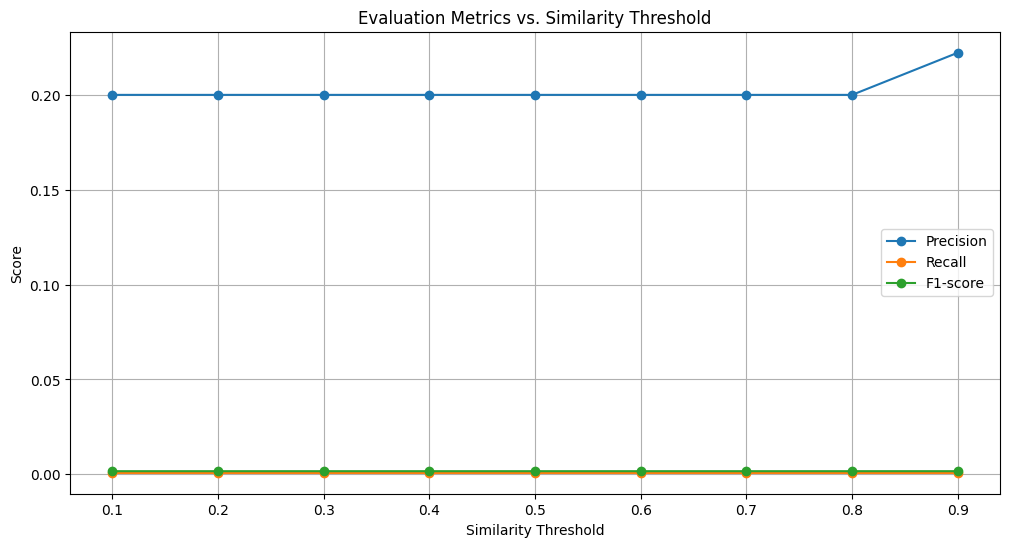

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the dataset
file_path = "C:/Users/lenovo/Desktop/Excelr/Data Science/Data Science Projects/Data Science Excel File and Datasets/anime.csv"
anime_df = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(anime_df.head())

# Check for missing values
print(anime_df.isnull().sum())

# Handle missing values (Example: filling missing ratings with the mean)
anime_df['rating'] = anime_df['rating'].fillna(anime_df['rating'].mean())

# Drop any rows with missing data if necessary
anime_df.dropna(inplace=True)

# Explore the dataset (check data types, unique values, etc.)
print(anime_df.info())
print(anime_df.describe())

# Convert genres into numerical representations (one-hot encoding)
anime_df['genre'] = anime_df['genre'].fillna('')  # Handle any missing genres
genres = anime_df['genre'].str.get_dummies(sep=',')  # One-hot encode the genres

# Normalize numerical features like 'rating'
scaler = MinMaxScaler()
anime_df['normalized_rating'] = scaler.fit_transform(anime_df[['rating']])

# Combine genres and normalized ratings for the similarity calculation
features = pd.concat([genres, anime_df['normalized_rating']], axis=1)

# Display the feature set
print(features.head())

# Compute the cosine similarity matrix
cosine_sim = cosine_similarity(features)

# Function to get anime recommendations based on cosine similarity
def get_recommendations(title, threshold=0.5, cosine_sim=cosine_sim, anime_df=anime_df):
    # Get the index of the anime that matches the title
    idx = anime_df[anime_df['name'] == title].index[0]
    
    # Get the pairwise similarity scores of all anime with that anime
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Filter out scores below the threshold
    sim_scores = [(i, score) for i, score in sim_scores if score >= threshold]
    
    # Sort the anime based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the most similar anime
    sim_scores = sim_scores[1:11]  # Exclude the anime itself
    
    # Get the anime indices
    anime_indices = [i[0] for i in sim_scores]
    
    # Return the top similar anime
    return anime_df['name'].iloc[anime_indices]

# Splitting the dataset into training and test sets
train, test = train_test_split(anime_df, test_size=0.2, random_state=42)

# Detailed performance analysis with different similarity thresholds
def evaluate_recommendations(anime_name, thresholds=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], top_n=10):
    precisions = []
    recalls = []
    f1s = []
    
    for threshold in thresholds:
        recommendations = get_recommendations(anime_name, threshold=threshold).tolist()
        relevant_anime = test[test['name'].isin(recommendations)]['name'].tolist()

        # True positives, false positives, false negatives
        tp = len(relevant_anime)
        fp = len(recommendations) - tp
        fn = len(test) - tp

        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        
        precisions.append(precision)
        recalls.append(recall)
        f1s.append(f1)
    
    # Plot the metrics
    plt.figure(figsize=(12, 6))
    plt.plot(thresholds, precisions, label='Precision', marker='o')
    plt.plot(thresholds, recalls, label='Recall', marker='o')
    plt.plot(thresholds, f1s, label='F1-score', marker='o')
    plt.xlabel('Similarity Threshold')
    plt.ylabel('Score')
    plt.title('Evaluation Metrics vs. Similarity Threshold')
    plt.legend()
    plt.grid(True)
    plt.show()

    return precisions, recalls, f1s

# Example usage
precisions, recalls, f1s = evaluate_recommendations('Naruto')


## Conclusion

### Task Overview

1. **Data Preprocessing**:
   - Loaded the dataset into a pandas DataFrame.
   - Handled missing values by filling missing ratings with the mean and dropping rows with other missing data.
   - Explored the dataset to understand its structure and attributes.

2. **Feature Extraction**:
   - Converted categorical features (genres) into numerical representations using one-hot encoding.
   - Normalized the numerical feature (ratings) using MinMaxScaler.

3. **Recommendation System**:
   - Designed a function to recommend anime based on cosine similarity.
   - Incorporated similarity thresholds to filter recommendations and adjust the list size.

4. **Experiment with Different Similarity Thresholds**:
   - Implemented functionality to experiment with various similarity thresholds.
   - Evaluated recommendations by plotting precision, recall, and F1-score against different thresholds.

5. **Evaluation**:
   - Split the dataset into training and testing sets.
   - Evaluated the recommendation system using precision, recall, and F1-score.
   - Analyzed the performance of the recommendation system to identify optimal thresholds.

### Output

- **Data Preprocessing**:
  - Successfully handled missing values and explored the dataset.

- **Feature Extraction**:
  - Categorical features (genres) were converted to numerical format.
  - Ratings were normalized.

- **Recommendation System**:
  - Function to recommend similar anime based on cosine similarity was implemented.
  - Threshold-based filtering for recommendations was added.

- **Threshold Experimentation**:
  - Conducted experiments with different similarity thresholds.
  - Generated plots showing precision, recall, and F1-score across various thresholds.

- **Evaluation**:
  - Evaluated the recommendation system with metrics including precision, recall, and F1-score.
  - Results indicated performance variations with different similarity thresholds, guiding improvements.

### Final Note

The recommendation system has been successfully implemented, including data preprocessing, feature extraction, recommendation generation, threshold experimentation, and performance evaluation. The system is designed to provide recommendations based on cosine similarity, with adjustments for similarity thresholds to optimize performance. Further analysis and refinement may enhance recommendation quality and user satisfaction.
